In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/MyDrive/datatset/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',names=['target','id','date','flag','user','text'],index_col=False)

In [4]:
df.shape

(1600000, 6)

In [5]:
df=df.dropna()
df.shape

(1600000, 6)

In [6]:
df['target'].unique()

array([0, 4])

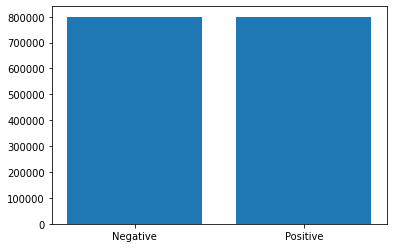

In [7]:
# converting to positive and negative
classes=df.target.unique()
counts=[]
for i in classes:
  count=len(df[df.target == i])
  counts.append(count)
plt.bar(['Negative','Positive'],counts)
plt.show()

In [8]:
df['text_without_stopwords'] = df['text'].str.lower() 

In [9]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
df['text_without_stopwords'] = df['text_without_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.drop(['text'],axis=1,inplace=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
# for @ re post
import re

def remove_usernames_links(tweet):
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('http[^\s]+','',tweet)
    return tweet
df['text_without_stopwords'] = df['text_without_stopwords'].apply(remove_usernames_links)

In [11]:
# for url
df["text_without_stopwords"] = df["text_without_stopwords"].str.replace(r'\s*https?://\S+(\s+|$)-;', ' ').str.strip()
# for special character 
df['text_without_stopwords'] = df['text_without_stopwords'].str.replace(r"[\"\'\|\?\=\.\;\#\*\-\,\?\:\{\}\+\%\!\/]", '')
# for number
df['text_without_stopwords'] = df['text_without_stopwords'].str.replace('\d+', '')

<ipython-input-11-29e0a39c6e3e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text_without_stopwords"] = df["text_without_stopwords"].str.replace(r'\s*https?://\S+(\s+|$)-;', ' ').str.strip()
<ipython-input-11-29e0a39c6e3e>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_without_stopwords'] = df['text_without_stopwords'].str.replace(r"[\"\'\|\?\=\.\;\#\*\-\,\?\:\{\}\+\%\!\/]", '')
<ipython-input-11-29e0a39c6e3e>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_without_stopwords'] = df['text_without_stopwords'].str.replace('\d+', '')


In [12]:
# steming
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
Lemmatizer=WordNetLemmatizer()
def work(word):
  word=Lemmatizer.lemmatize(word)
  return word
df['text_without_stopwords']=df['text_without_stopwords'].apply(work)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [13]:
for i in range(50):
  print(df['text_without_stopwords'][i])

 awww thats bummer shoulda got david carr third day it d
upset cant update facebook texting it might cry result school today also blah
dived many times ball managed save  rest go bounds
whole body feels itchy like fire
no behaving all im mad here cant see there
whole crew
need hug
hey long time see yes rains bit only bit lol  im fine thanks  hows 
nope
que muera 
spring break plain city snowing
repierced ears
bear watch it thought ua loss embarrassing     
counts idk either never talk anymore
wouldve first gun really though zac snyders doucheclown
wish got watch you miss  premiere
hollis death scene hurt severely watch film wry directors cut now
file taxes
ahh ive always wanted see rent love soundtrack
oh dear drinking forgotten table drinks
day get much done
one friend called me asked meet mid valley todaybut ive time sigh
baked cake ated
week going hoped
blagh class  tomorrow
hate call wake people
going cry sleep watching marley me
im sad misslilly
ooooh lol leslie ok leslie get mad


In [14]:
x=df.text_without_stopwords.values
y=df.target.values

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(max_features=5000,ngram_range=(1,3))
x_done=vectorizer.fit_transform(x)

In [22]:
x_done.shape

(1600000, 5000)

In [23]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_done, y, test_size=0.10, random_state=673)

In [36]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha=0.1)

In [37]:
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [38]:
pred1=classifier.predict(X_test)
prdiction_train1=classifier.predict(X_train)

In [39]:
from sklearn.metrics import accuracy_score
accuracy11 = accuracy_score(y_train,prdiction_train1)
print("Accuracy for Train",accuracy11*100)

Accuracy for Train 75.82388888888889


In [40]:
accuracy2 = accuracy_score(y_test,pred1)
print("Accuracy for Test",accuracy2*100)

Accuracy for Test 75.6275
